<a href="https://colab.research.google.com/github/mmahisans/Ice-Cream-Revenue-Prediction/blob/main/Metnum_Quadratic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRARY

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

LOADING THE DATA

In [3]:
data = pd.read_csv('Ice Cream.csv')
x = data['Temperature'].values
y = data['Revenue'].values

SPLIT THE DATA TO TRAINING AND TESTING SET

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

QUADRATIC FUNCTION

In [5]:
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

FITTING THE FUNCTION TO THE DATA

In [6]:
params, covariance = curve_fit(quadratic, x_train, y_train)
a, b, c = params

PREDICT ON TRAINING DATA

In [7]:
y_train_pred = quadratic(x_train, a, b, c)

CALCULATING THE ERROR FOR TRAINING DATA

In [8]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

PREDICT ON TESTING DATA

In [9]:
y_test_pred = quadratic(x_test, a, b, c)

CALCULATING THE ERROR FOR TESTING DATA

In [10]:
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

INITIALIZATION

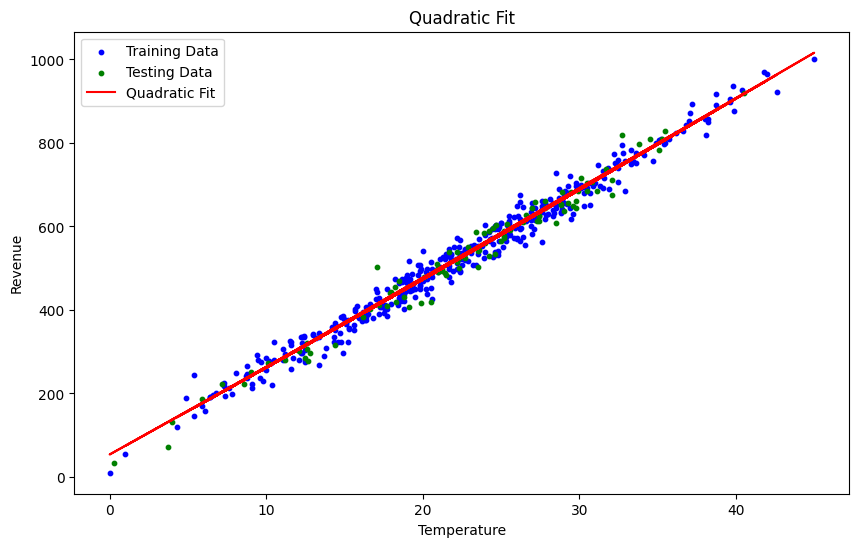

Training Set:
Quadratic model: y = 0.017x^2 + 20.611x + 53.655
Mean Absolute Error (MAE): 19.544
Mean Squared Error (MSE): 611.205
Root Mean Squared Error (RMSE): 24.723

Testing Set:
Mean Absolute Error (MAE): 19.180
Mean Squared Error (MSE): 655.478
Root Mean Squared Error (RMSE): 25.602


In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Training Data', color='blue', s=10)
plt.scatter(x_test, y_test, label='Testing Data', color='green', s=10)
plt.plot(x_train, quadratic(x_train, a, b, c), color='red', label='Quadratic Fit')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.title('Quadratic Fit')
plt.legend()
plt.show()

print('Training Set:')
print(f'Quadratic model: y = {a:.3f}x^2 + {b:.3f}x + {c:.3f}')
print(f'Mean Absolute Error (MAE): {mae_train:.3f}')
print(f'Mean Squared Error (MSE): {mse_train:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse_train:.3f}')

print('\nTesting Set:')
print(f'Mean Absolute Error (MAE): {mae_test:.3f}')
print(f'Mean Squared Error (MSE): {mse_test:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse_test:.3f}')

In [12]:
while True:
    new_temp = float(input("Enter a new temperature value (or type 'exit' to quit): "))
    if new_temp == 'exit':
        break
    else:
        new_revenue = quadratic(new_temp, a, b, c)
        print(f'Predicted revenue for temperature {new_temp}: {new_revenue:.2f}')

Enter a new temperature value (or type 'exit' to quit): 23.3
Predicted revenue for temperature 23.3: 543.28
Enter a new temperature value (or type 'exit' to quit): 46
Predicted revenue for temperature 46.0: 1038.38
Enter a new temperature value (or type 'exit' to quit): -5
Predicted revenue for temperature -5.0: -48.97
Enter a new temperature value (or type 'exit' to quit): exit


ValueError: could not convert string to float: 'exit'